In [2]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output
import os

In [3]:
if not os.path.isdir('./figure/LinearClassificationExample/'):
    os.makedirs('./figure/LinearClassificationExample/')
figure_dir = './figure/LinearClassificationExample/'

## Data

In [4]:
# choose the curves
x = np.arange(-1,1,0.05)

y1 = -0.6*np.sin(3*x+np.pi/2)-0.35

# Shifting the curve here
#y2 = -0.6*np.sin(3*x+np.pi/2)+0.25
y2 = -0.6*np.sin(3*x+np.pi/2)+1.25

Text(0.5, 1.0, 'Linear Classfication Example')

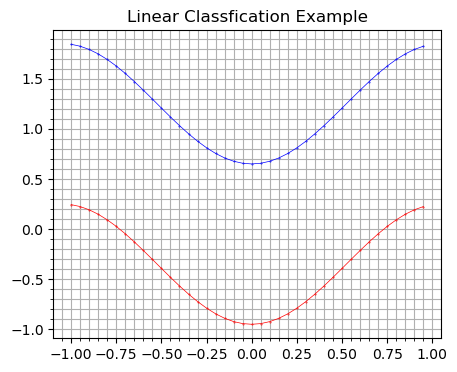

In [5]:
plt.figure(figsize=(5,4))
plt.minorticks_on()
plt.grid(which='both')
plt.plot(x, y1, 'r.-', linewidth=0.5, markersize=0.75)
plt.plot(x, y2, 'b.-', linewidth=0.5, markersize=0.75)
plt.title('Linear Classfication Example')

## Objective Functions

In [6]:
# Objective Function
def gradFunc1(params, X, Y, x, y1, y2):
    
    m, h = params

    grad_m = grad_h = 0

    # for y2 t = 1
    mae = np.mean(((y1+y2)/2 - (m*x+h))**2) # Mean average error
    grad_m = -2*np.sum(((y1+y2)/2 - (m*x+h))*x)
    grad_h = -2*np.sum(((y1+y2)/2 - (m*x+h))*1)

    clear_output(wait=True)               
    plt.figure(figsize=(6,6))
                     
    plt.minorticks_on()
    #plt.grid(which='both')
    n1 = X.shape[0]
    n2 = X.shape[1]
    for i in range(n1):
        plt.plot(X[i, :], Y[i, :], 'c.-', linewidth=0.5, markersize=1)
    for j in range(n2):
        plt.plot(X[:, j], Y[:, j], 'c.-', linewidth=0.5, markersize=1)
    plt.plot(x, y1, 'b.-')
    plt.plot(x, y2, 'r.-')
    plt.plot(x, m*x+h, 'g-')
    plt.fill_between(x, np.min([-1,np.min(m*x+h)]), m*x+h, color='g',alpha=0.3)
    plt.fill_between(x, m*x+h, 2, color='r',alpha=0.3)
    plt.title("mae:{:.3f}".format(mae))

    plt.pause(0.1)

    gradLoss = [grad_m, grad_h]
    return mae, gradLoss

In [7]:
# Objective Function
def gradFunc2(params, X, Y, x, y1, y2, margin):
    
    a, b, c = params

    grad_a = grad_b = grad_c = 0
    mae= 0

    # Positive margin
    # for y2 t = 1
    e = +1 * (a + b*x + c*y2 - margin)
    mae    -= np.sum(e[e < 0])
    grad_a -= np.sum([e < 0])
    grad_b -= np.sum(x[e < 0])
    grad_c -= np.sum(y2[e < 0])

    # Negative margin
    # for y1 t = -1
    e = -1 * (a + b*x + c*y1 + margin)
    mae    -= np.sum(e[e < 0])
    grad_a += np.sum([e < 0])
    grad_b += np.sum(x[e < 0])
    grad_c += np.sum(y1[e < 0])

    clear_output(wait=True)               
    plt.figure(figsize=(6,6))
                     
    plt.minorticks_on()
    #plt.grid(which='both')
    n1 = X.shape[0]
    n2 = X.shape[1]
    for i in range(n1):
        plt.plot(X[i, :], Y[i, :], 'c.-', linewidth=0.5, markersize=1)
    for j in range(n2):
        plt.plot(X[:, j], Y[:, j], 'c.-', linewidth=0.5, markersize=1)
    plt.plot(x, y1, 'b.-')
    plt.plot(x, y2, 'r.-')
    plt.plot(x, -(a+b*x)/c, 'g-')
    plt.fill_between(x, np.min([-1,np.min(-(a+b*x)/c)]), -(a+b*x)/c, color='g',alpha=0.3)
    plt.fill_between(x, -(a+b*x)/c, 2, color='r',alpha=0.3)
    plt.title("mae:{:.3f}".format(mae))

    plt.pause(0.1)

    gradLoss = [grad_a, grad_b, grad_c]
    return mae, gradLoss

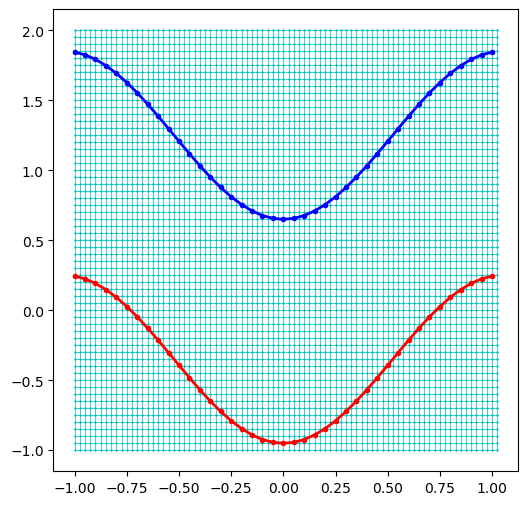

In [8]:
# Data
X, Y = np.meshgrid(np.arange(-1, 1.05, 0.025), np.arange(-1, 2.05, 0.05))
n1 = X.shape[0]
n2 = X.shape[1]  # Use X.shape[1] to get the number of columns

plt.figure(figsize=(6,6))
# Plot the mesh grid
for i in range(n1):
    plt.plot(X[i, :], Y[i, :], 'c.-', linewidth=0.5, markersize=1)
for j in range(n2):
    plt.plot(X[:, j], Y[:, j], 'c.-', linewidth=0.5, markersize=1)

x = np.arange(-1, 1.05, 0.05)
y1 = -0.6 * np.sin(3 * x + np.pi / 2) - 0.35
y2 = -0.6 * np.sin(3 * x + np.pi / 2) + 1.25
plt.plot(x, y1, 'r.-', linewidth=2)
plt.plot(x, y2, 'b.-', linewidth=2)
plt.show()




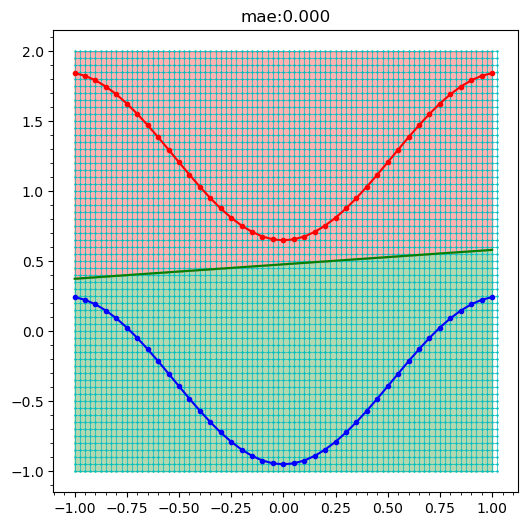

Error function is zero at iteration: 4.00


In [18]:
# Parameters switch between params1 and params2
#params for objective function 1
#params = [-0.5, 1]
#params for objective function 2
params = [-1.2, -0.5, 1]

nIters = 20
g1 = 0.02 # learning rate
margin = 0.2 # threshold or margin
for i in range(nIters):
    # gradFunction switch between gradFunc1 and gradFunc2
    #mae, delF = gradFunc1(params, X, Y, x, y1, y2)
    mae, delF = gradFunc2(params, X, Y, x, y1, y2, margin)
    params = params - g1 * np.array(delF)
    plt.pause(0.2)
    if mae == 0:
        print("Error function is zero at iteration: {:.2f}".format(i))
        break